In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/ipl.csv')

# Display the first few rows of the dataframe
print(df.head())


   mid        date                  venue               bat_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0        0            0    222 

In [2]:
# Check for null values and data types
print(df.info())

# Encoding categorical variables
df['venue'] = df['venue'].astype('category').cat.codes
df['bat_team'] = df['bat_team'].astype('category').cat.codes
df['bowl_team'] = df['bowl_team'].astype('category').cat.codes
df['batsman'] = df['batsman'].astype('category').cat.codes
df['bowler'] = df['bowler'].astype('category').cat.codes

# Define features and target variable
X = df[['venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']]
y = df['total']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB
None


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred_lin = lin_reg.predict(X_test)

# Evaluate the model
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))
print("Linear Regression R^2:", r2_score(y_test, y_pred_lin))


Linear Regression MSE: 402.0143810236879
Linear Regression R^2: 0.523392508190674


In [5]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluate the model
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_tree))
print("Decision Tree R^2:", r2_score(y_test, y_pred_tree))


Decision Tree MSE: 135.68909782060558
Decision Tree R^2: 0.8391340120383939


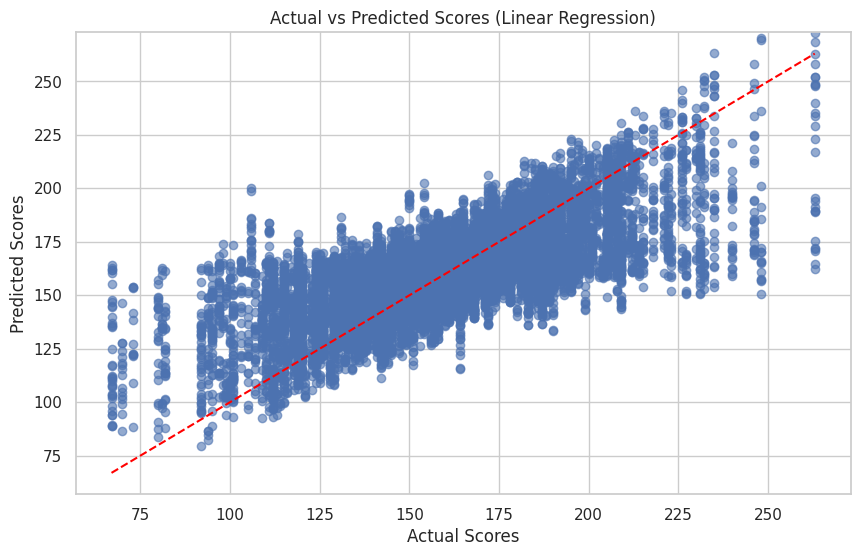

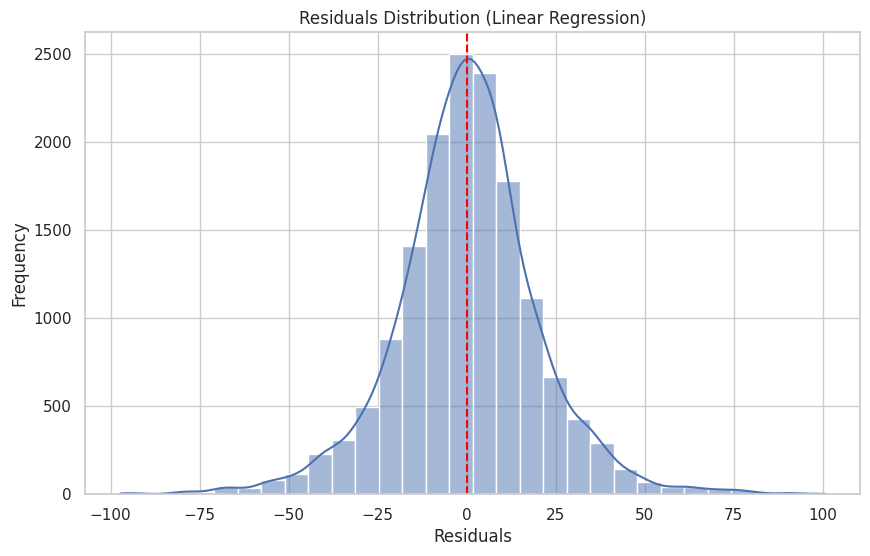

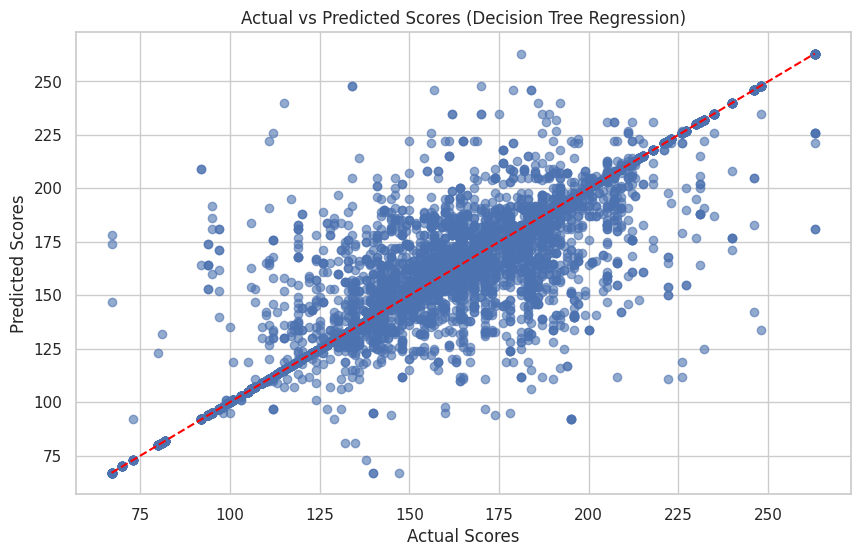

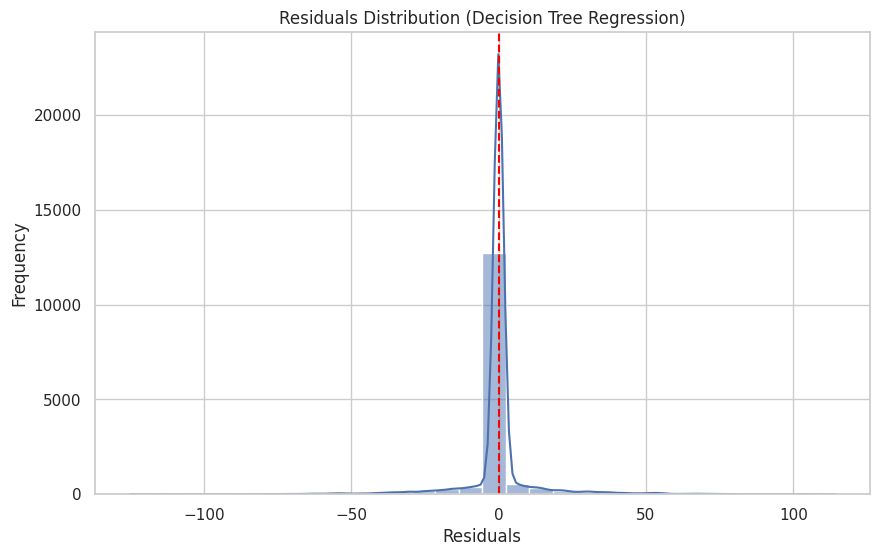

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Function to plot actual vs predicted scores
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title(f'Actual vs Predicted Scores ({model_name})')
    plt.xlabel('Actual Scores')
    plt.ylabel('Predicted Scores')
    plt.xlim(y_test.min() - 10, y_test.max() + 10)
    plt.ylim(y_test.min() - 10, y_test.max() + 10)
    plt.show()

# Function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, bins=30, kde=True)
    plt.title(f'Residuals Distribution ({model_name})')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.axvline(0, color='red', linestyle='--')
    plt.show()

# Plot for Linear Regression
plot_actual_vs_predicted(y_test, y_pred_lin, 'Linear Regression')
plot_residuals(y_test, y_pred_lin, 'Linear Regression')

# Plot for Decision Tree Regression
plot_actual_vs_predicted(y_test, y_pred_tree, 'Decision Tree Regression')
plot_residuals(y_test, y_pred_tree, 'Decision Tree Regression')


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R^2:", r2_score(y_test, y_pred_rf))


Random Forest MSE: 73.8938361470307
Random Forest R^2: 0.9123952834310909


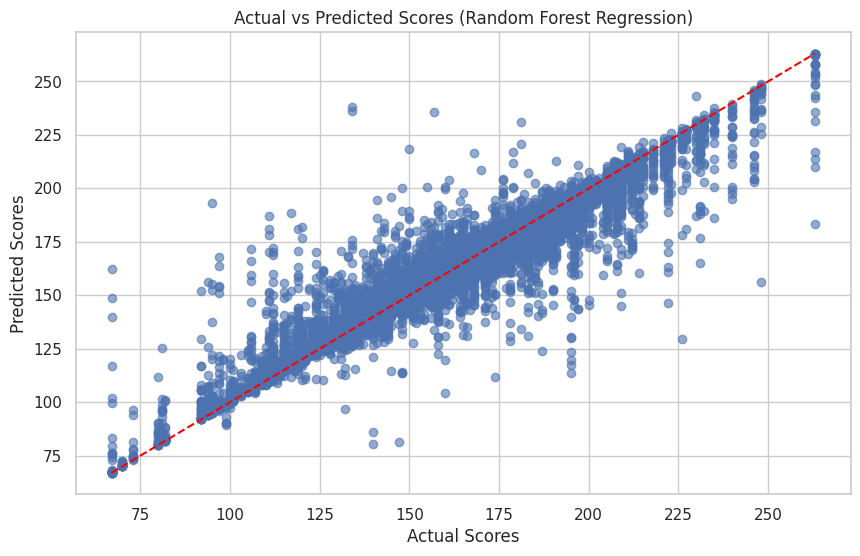

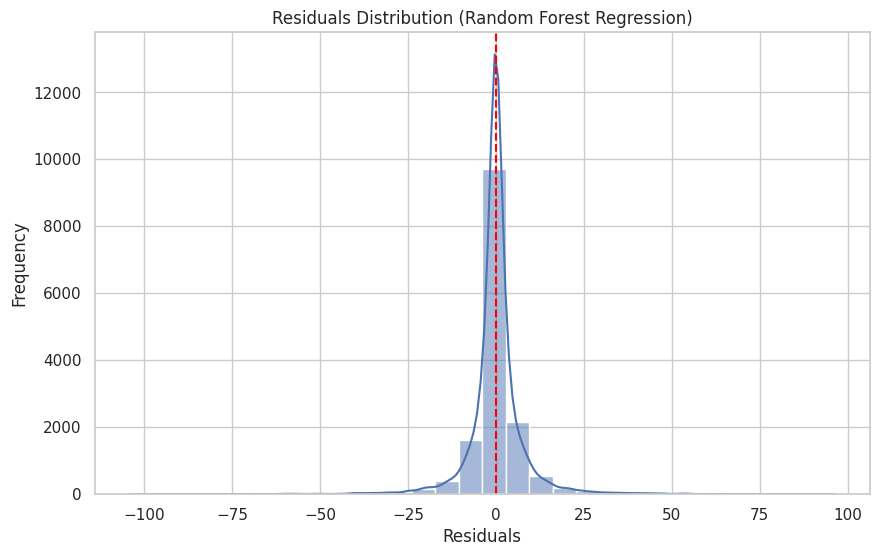

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Function to plot actual vs predicted scores
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title(f'Actual vs Predicted Scores ({model_name})')
    plt.xlabel('Actual Scores')
    plt.ylabel('Predicted Scores')
    plt.xlim(y_test.min() - 10, y_test.max() + 10)
    plt.ylim(y_test.min() - 10, y_test.max() + 10)
    plt.show()

# Function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, bins=30, kde=True)
    plt.title(f'Residuals Distribution ({model_name})')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.axvline(0, color='red', linestyle='--')
    plt.show()

# Plot for Random Forest Regression
plot_actual_vs_predicted(y_test, y_pred_rf, 'Random Forest Regression')
plot_residuals(y_test, y_pred_rf, 'Random Forest Regression')
